# Assignment VII: Topic Modeling

## Question 1

Perform an analysis of Topic Modeling on the corpus, `nltk.corpus.movive_reviews`, and provide the topic distributions of the movie reviews. Please report your topic distributions of positive and negative reviews respectively. (But please note that the topic modeling analysis should take the entire corpus as the input.)

Some heuristics for data preprocessing/vectorization:

- Include in the bag-of-words representation only words whose lengths are >= 3
- Include in the bag-of-words representation only words that are nouns (`NN` or `NNS`) or verbs (`VB.`)
- Lemmatize all words in the bag-of-words representation using WordNet
- Remove words on the stopwords list in `nltk.corpus.stopwords.words('english')`
- Play with the `min_df` and `max_df` to find a better structure of CountVectorizer for the topic modeling


:::{warning}

As this is an unsupervised learning, it is ok if you get different results. Please base your interpretations of the topics by examining closely their respective associated words in your LDA model.

:::

In [1]:
import nltk, random, re
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document
## Check Sentiment Distribution of the Current Dataset
from collections import Counter
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight
Counter({'pos': 1000, 'neg': 1000})


In [3]:
## Data Preprocessing


## POS Tagging
corpus_pos = [nltk.pos_tag(words) for (words,tag) in documents]
corpus_sentiment = [tag for (_,tag) in documents]

In [4]:
## POS Filtering and Word Lengths Cutoff
norm_corpus = [[(w,t) for (w,t) in doc if len(w)>=3 and re.match(r'^(VB.+?|NN|NNS)$', t)] for doc in corpus_pos]

In [5]:
norm_corpus[:1]

[[('movies', 'NNS'),
  ('seem', 'VBP'),
  ('movie', 'NN'),
  ('called', 'VBN'),
  ('trilogy', 'NN'),
  ('iii', 'NN'),
  ('seems', 'VBZ'),
  ('kind', 'NN'),
  ('fit', 'NN'),
  ('category', 'NN'),
  ('manages', 'VBZ'),
  ('formula', 'NN'),
  ('loses', 'NNS'),
  ('fight', 'VBD'),
  ('trains', 'NNS'),
  ('wins', 'NNS'),
  ('carried', 'VBN'),
  ('letter', 'NN'),
  ('tradition', 'NN'),
  ('showing', 'VBG'),
  ('minutes', 'NNS'),
  ('rocky', 'NN'),
  ('film', 'NN'),
  ('used', 'VBN'),
  ('movie', 'NN'),
  ('begins', 'VBZ'),
  ('series', 'NN'),
  ('clips', 'NNS'),
  ('showing', 'VBG'),
  ('rocky', 'NN'),
  ('stallone', 'NN'),
  ('has', 'VBZ'),
  ('become', 'VBN'),
  ('showing', 'VBG'),
  ('appearance', 'NN'),
  ('street', 'NN'),
  ('moves', 'VBZ'),
  ('being', 'VBG'),
  ('fight', 'NN'),
  ('thunderlips', 'NNS'),
  ('hogan', 'NN'),
  ('ass', 'NN'),
  ('known', 'VBN'),
  ('clubber', 'NN'),
  ('lang', 'NN'),
  ('trash', 'NN'),
  ('talks', 'NNS'),
  ('decision', 'NN'),
  ('boxing', 'VBG'),
  ('pit

In [6]:
## Remove Digits and Symbols
## Lemmatizae Words

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
stop_words = nltk.corpus.stopwords.words('english')

ps=PorterStemmer()
wnl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN


norm_corpus2 = [' '.join([wnl.lemmatize(w, pos = get_wordnet_pos(t[0])) for (w, t) in doc if not re.match(r'[^a-z]+', w) and w not in stop_words]) for doc in norm_corpus]

In [7]:
norm_corpus2[0]

'movie seem movie call trilogy iii seem kind fit category manage formula loses fight train win carry letter tradition show minute rocky film use movie begin series clip show rocky stallone become show appearance street move fight thunderlips hogan as know clubber lang trash talk decision box pity fool come fight trainer meredith tell stallion listen get as kick line thing happen trainer dy cause rocky opponent apollo creed wife complains husband fight ensues clubber rocky guess win winner name rhyme movie entertaning clubber lang performance aspect tone action seem point film like fight scene match like film rent see fan series stand shout adrianne time see something'

In [8]:
# ## normalize corpus
# stop_words = nltk.corpus.stopwords.words('english')

# def normalize_document(doc):
#     # lower case and remove special characters\whitespaces
#     doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
#     doc = doc.lower()
#     doc = doc.strip()
#     # tokeanize document
#     tokens = wpt.tokenize(doc)
#     # filter stopwords out of document
#     filtered_tokens = [token for token in tokens if token not in stop_words]
#     # re-create document from filtered tokens
#     doc = ' '.join(filtered_tokens)
#     return doc

# normalize_corpus = np.vectorize(normalize_document)
# a

In [9]:
norm_corpus2[:2]

['movie seem movie call trilogy iii seem kind fit category manage formula loses fight train win carry letter tradition show minute rocky film use movie begin series clip show rocky stallone become show appearance street move fight thunderlips hogan as know clubber lang trash talk decision box pity fool come fight trainer meredith tell stallion listen get as kick line thing happen trainer dy cause rocky opponent apollo creed wife complains husband fight ensues clubber rocky guess win winner name rhyme movie entertaning clubber lang performance aspect tone action seem point film like fight scene match like film rent see fan series stand shout adrianne time see something',
 'happen put lawrence suit life get lawrence coma comedian think get put layer clothing go jogging degree heat end coma happen put lawrence suit movie get audience coma momma house lawrence play agent master disguise naughty man escape jail seek girlfriend nia thing worth look movie flee aunt momma ella mitchell fbi fol

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=20, max_df=0.6)
cv_matrix = cv.fit_transform(norm_corpus2)
cv_matrix

<2000x2671 sparse matrix of type '<class 'numpy.int64'>'
	with 241055 stored elements in Compressed Sparse Row format>

In [11]:

vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix.toarray(), columns=vocab)

,abandon,ability,absence,absorb,abuse,abyss,academy,accent,accept,accident,...,write,writer,writing,yawn,yeah,year,yell,york,youth,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,3,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,3,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,2,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

num_of_topic = 4
lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000, random_state=0,
                               max_doc_update_iter=50, learning_method='online',
                               batch_size=50, learning_offset = 50, n_jobs = -1)
doc_topic_matrix = lda.fit_transform(cv_matrix)

CPU times: user 4min 41s, sys: 20.2 s, total: 5min 1s
Wall time: 14min 53s


In [13]:
topic_word_matrix = lda.components_

In [14]:
## Topic By Word (transpose)
pd.DataFrame(np.transpose(topic_word_matrix), index=vocab)


,0,1,2,3
abandon,38.372332,0.277083,19.148534,12.180082
ability,60.175386,0.266181,65.400346,62.075002
absence,12.659379,6.344827,6.897791,2.178752
absorb,20.410531,0.276773,7.103845,2.205141
abuse,13.406716,0.258951,29.133532,0.260695
...,...,...,...,...
year,665.076112,48.295147,643.953045,376.499673
yell,4.737740,4.688164,27.708165,1.865288
york,83.837184,0.260956,108.441622,71.343064
youth,23.456108,2.729870,19.220925,9.635706


In [15]:
## This function sorts the words importances under each topic
## and the selectional criteria include (a) ranks based on weights, or (b) cutoff on weights
def get_topics_meanings(tw_m, vocab, display_weights=False, topn = 5, weight_cutoff=0.6):
    for i, topic_weights in enumerate(tw_m): ## for each topic row
        topic = [(token, np.round(weight,2)) for token, weight in zip(vocab, topic_weights)] ## zip (word, importance_weight)
        topic = sorted(topic, key=lambda x: -x[1]) ## rank words according to weights                  
        if display_weights:
            topic = [item for item in topic if item[1] > weight_cutoff] ## output words whose weights > 0.6
            print(f"Topic #{i} :\n{topic}")
            print("="*20)
        else:
            topic_topn = topic[:topn]
            topic_topn = ' '.join([word for word,weight in topic_topn])
            print(f"Topic #{i} :\n{topic_topn}")
            print('='*20)

In [16]:
## Permanent Setting Version
plt.rcParams['font.sans-serif']=["PingFang HK"]
def plot_top_words(model, feature_names, n_top_words, title, fig_grid=[2,2]):
    fig, axes = plt.subplots(fig_grid[0], fig_grid[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

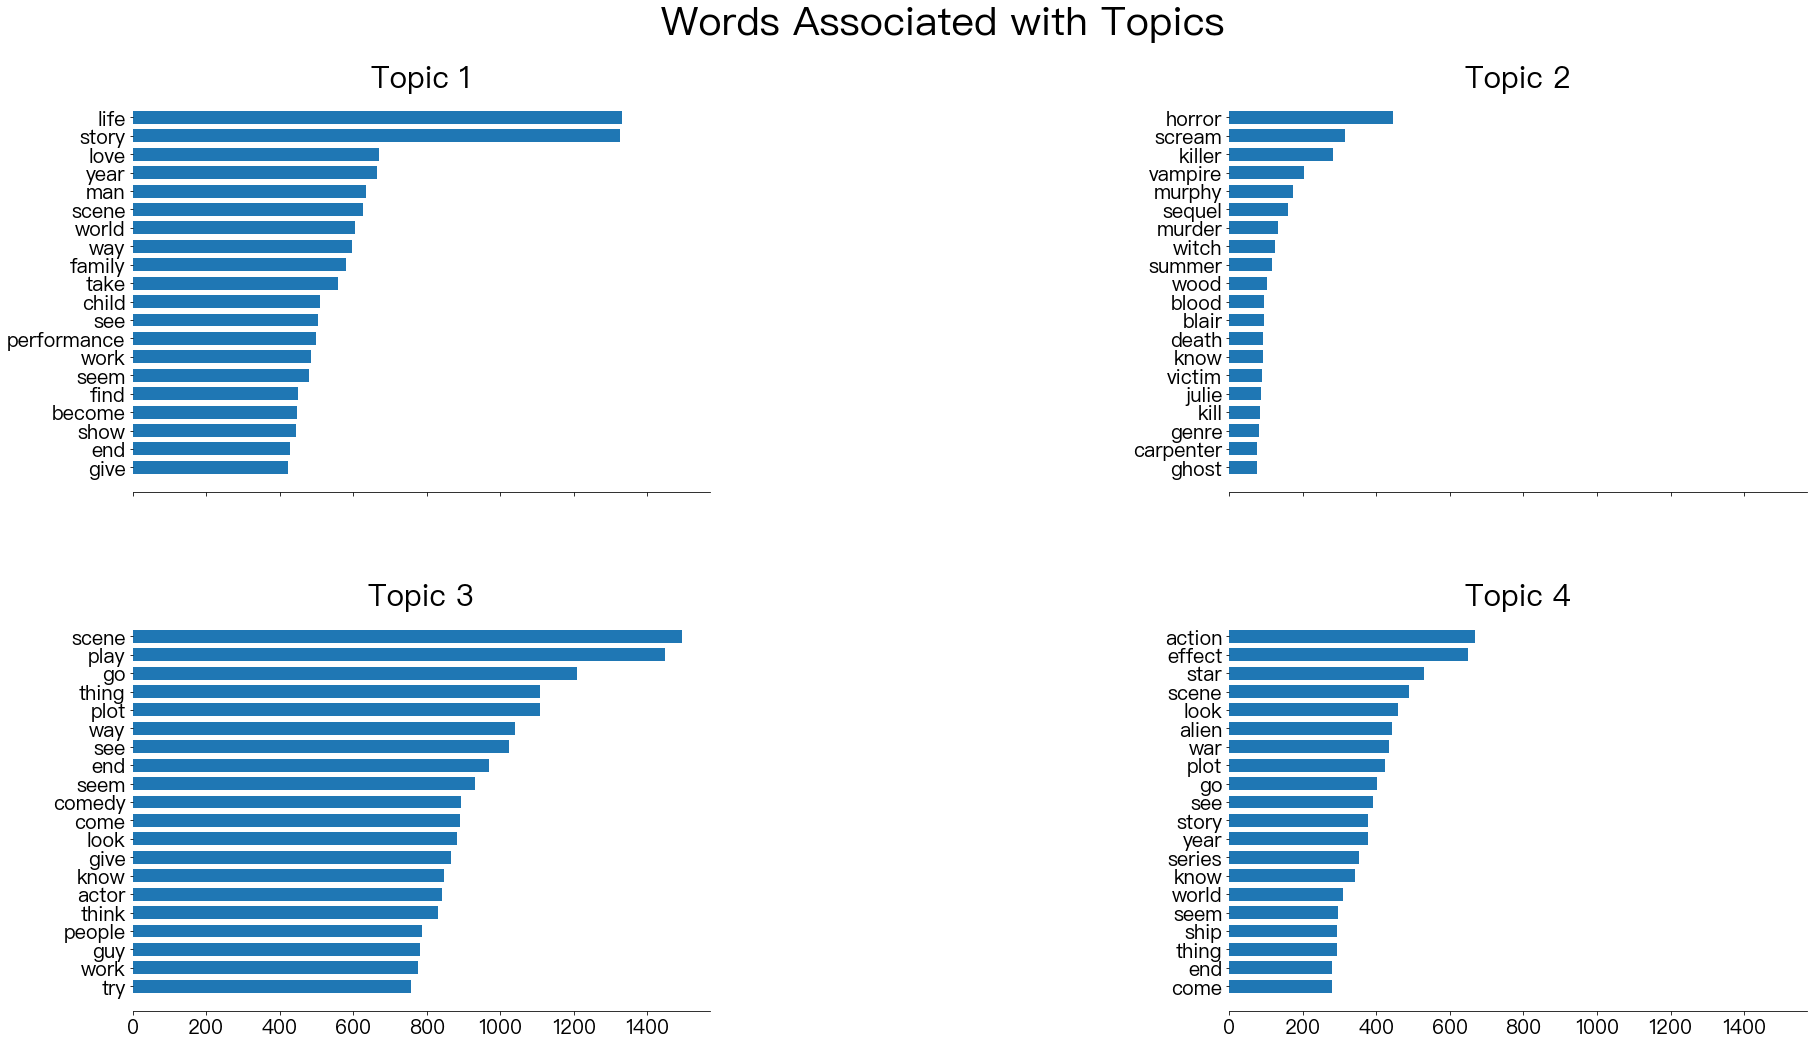

In [17]:
plot_top_words(lda, vocab, 20, "Words Associated with Topics", fig_grid=[2,2])

In [18]:
get_topics_meanings(topic_word_matrix, vocab, display_weights=False, topn=10)


Topic #0 :
life story love year man scene world way family take
Topic #1 :
horror scream killer vampire murphy sequel murder witch summer wood
Topic #2 :
scene play go thing plot way see end seem comedy
Topic #3 :
action effect star scene look alien war plot go see


In [19]:
topics = ['LOVE_FAMILY (T0)', "HORROR(T1)", "PLOT(T2)","EFFECT(T3)"]
doc_topic_label = [topics[np.argmax(i)] for i in doc_topic_matrix]

doc_topic_df = pd.DataFrame({"REVIEW_SENTIMENT": corpus_sentiment, "TOPIC": doc_topic_label})

In [20]:
import plotnine
from plotnine import ggplot, aes, geom_line, geom_bar, labs
from plotnine import scale_fill_brewer
plotnine.options.dpi=200

g =(
    ggplot(doc_topic_df)
    + aes(x="TOPIC", fill="REVIEW_SENTIMENT") 
    + geom_bar(position="dodge")
    + labs(y = "Number of Documents")
    + scale_fill_brewer(palette=18, name="Review Sentiments", labels=["Negative Reviews","Positive Reviews"])
    
)


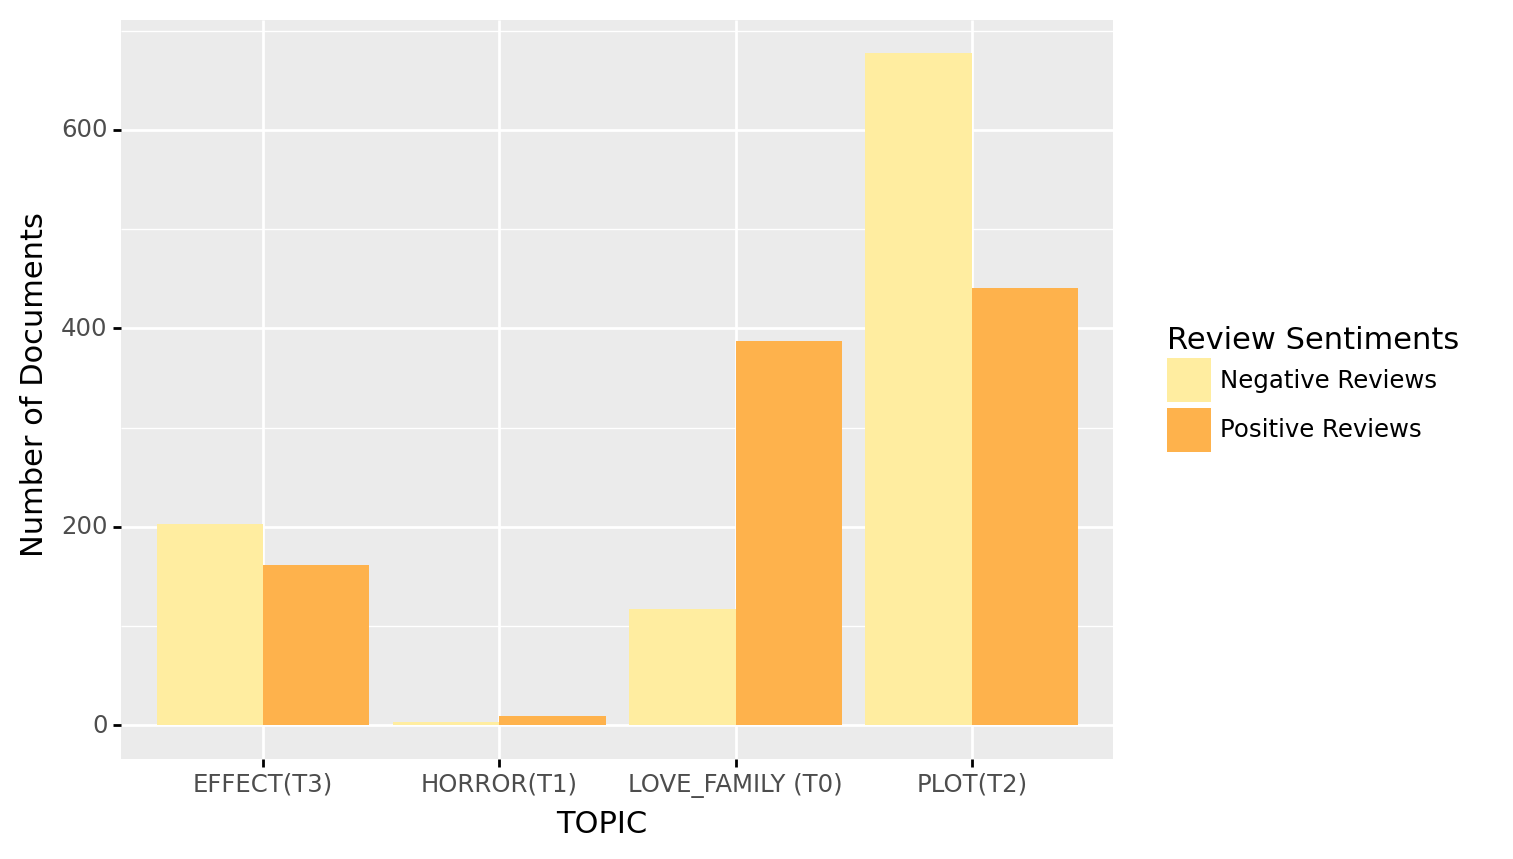

<ggplot: (8790600018531)>

In [21]:
g

## Question 2

Use the `demo_data/dcard-top100.csv` dataset (the same one used in the previous Assignment) and perform topic modeling on the dataset to explore the main topics of this small corpus.

To increase the interpretability of the topic modeling results, please word-segment the corpus data using `ckip-transformers` and then include word tokens whose POS indicate they are either nouns or verbs. However, please exclude pronouns and numerals. Also, before word segmentation, please preprocess the texts by removing alphabets, digits, and symbols first.

Please report (a) the meanings of the topics and their associated top 20 words in the corpus, and (b) the distribution of the topics in the entire corpus.

### Import necessary dependencies and settings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random

pd.options.display.max_colwidth = 200
%matplotlib inline

### Sample corpus of text documents

In [3]:
corpus_df = pd.read_csv('../../../RepositoryData/data/dcard-top100.csv')
corpus_df.head()

,ID,title,content
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg


In [4]:
corpus = corpus_df['content']
# remove url first
corpus = [re.sub(r'(?:http(s)?:\/\/)?[\w.-]+(?:\.[\w\.-]+)+[\w\-\._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+', '\n', doc) for doc in corpus]

corpus = [re.sub(r'\n+','\n', doc) for doc in corpus] 

In [5]:
corpus_df.iloc[65,]

ID                                                                                    235443810
title                                                                                 優質cosplay
content    https://megapx-assets.dcard.tw/images/57a22cb7-3880-4e83-97a1-510a691bd1d9/1280.jpeg
Name: 65, dtype: object

In [6]:
## check each doc integrity, i.e., no empty strings

corpus_line_num = [len(doc) for doc in corpus]
corpus[np.argmin(corpus_line_num)]

ind =[i for i in range(len(corpus_line_num)) if corpus_line_num[i]==0]
np.array(corpus)[ind]

array([], dtype='<U4276')

In [7]:
## Perform the word segmentation in Google Colab.
## Load results
import pickle
with open('dcard_seg.pickle', 'rb') as f:
    dcard_seg = pickle.load(f)

In [8]:
## Prepare words for topic modeling
## From each document, keep only words tagged as N and V excluding numerals pronouns
norm_words = [[(w,p) for (w,p) in text if re.match(r'^[NV](?!(h|eu))',p)] for text in dcard_seg]
norm_corpus = [' '.join([w for w,p in text]) for text in norm_words]

# norm_corpus = [' '.join([w for (w,t) in doc if t in ['Na','VC']]) for doc in dcard_seg]# if len(doc)>0]

In [9]:
norm_corpus[65]

''

In [10]:
# check any zero documents
[(i,doc) for i, doc in enumerate(norm_corpus) if len(doc)==0]

[(65, '')]

In [11]:
### Remove Empty Document


corpus_df2 = corpus_df.drop(index=[65])
del norm_corpus[65]

In [12]:
corpus_df2.iloc[0:10]

,ID,title,content
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg
5,235441122,深夜被約砲哥開導4小時哭了,嗨！巨砲哥 答應你的文來了😆\n這是一段與約砲小哥哥談心的奇幻旅程\n\n可憐的我情人節當天被前男友提分手\n原本說好228連假要一起出去玩直接泡湯\n昨天晚上一整個很鬱卒 \n但又不想一直丟負能量給身邊朋友\n所以就上wootalk找人聊聊\n結果就遇到這個傳說中的暖男(?)巨砲哥\nhttps://i.imgur.com/nlzrqS3.jpg\n\n劈頭就問胸部多大⋯\n本來想按離開...
6,235442321,這樣真很暴露？？？,https://i.imgur.com/HCTwyAH.jpg\n（圖片非本人）\n今天逛街買了一件此類型的白色，但他有點透，所以裡面有配一件白色小可愛，但男友說還是太暴露！？想問各位男性朋友 可以接受女友穿這件衣服嗎？🤔
7,235442924,泳衣+裙會很怪嗎,https://i.imgur.com/RWJLK2v.jpg\n\n因為馬鞍很寬\n想請問女孩們會覺得加這種裙式沙龍好嗎？\n怕會不會很奇怪\n看模特兒穿又覺得蠻好看的\n怕實際穿出去會怪怪的
8,235441419,關於一個860的訂製蛋糕：）,手機排版請見諒😖🙏🏻（圖多）\n先說這不是我第一次訂購訂製蛋糕\n也了解訂製蛋糕不可能跟圖上一樣完美\n看到這間的ig上照片都很漂亮才選擇這間的\n\nhttps://i.imgur.com/fETTnah.jpg\n這張是訂購時給的參考圖\n\nhttps://i.imgur.com/XsBjPYR.jpg\n這張是我拿到後打開的樣子\n\n以下附上對話記錄\nhttps://i.img...
9,235440762,有女生提醒我男友吃早餐,https://i.imgur.com/6Yk9etg.jpg\n想在這裡問大家有沒有接到這種電話⋯\n我男友前幾個月有接到一次，電話內容就只有女生用嗲嗲的聲音提醒我男友吃早餐這樣而已。電話掛了之後男友也有跟我說是他不認識的。\n\n但因為自己心裡存有懷疑，隔天在上班的時候有叫男同事用我手機打過去問（男友有給我她的手機號碼截圖\n\n男同事一開始就問她是不是那位提醒自己吃早餐的那個女生，後...


In [13]:
print(corpus_df.shape)
print(corpus_df2.shape)
print(len(norm_corpus))

(100, 3)
(99, 3)
99


In [14]:
corpus_df2['Normalized'] = norm_corpus
corpus_df2

,ID,title,content,Normalized
0,235443715,三更 21歲這年我差點被活活燒死,部分回應在B117 \n謝謝各位的留言，我都有看完\n好的不好的，我都接受謝謝大家🙇‍♀️\n\n\n（第三次更新在這邊）\nB258 這邊也有講到怎麼逃生\n很多人好奇我是怎麼踹門的，\n在這邊跟大家說一下，\n因為這台車本來就很老舊，\n加上我文章說的我有停在路邊檢查，\n之前有在練空手道，所以比較知道怎麼施力😥\n謝謝大家的關心，其他比較有問題的我會在留言一一回覆！\n\n後續處理的...,部分 回應 謝謝 各位 留言 有 看完 好 好 接受 謝謝 次 更新 這邊 這邊 有 講到 逃生 很多 人 好奇 踹 門 這邊 說 一下 這 台 車 老舊 文章 說 有 停 路 邊 檢查 之前 有 練 空手道 知道 施力 謝謝 關心 其他 有 問題 留言 回覆 處理 部分 租 車 公司 有 很多 間 公司 當時 租 車 地方 新莊 中原路 平台 上 訂 租 車 公司 平台 講 家人 主動 ...
1,235442609,超狂學經歷！195公分帥家教徵學生,https://i.imgur.com/REIEzSd.jpg\n\n身高195公分的男大生楊承翰在家教社團PO文徵學生的文章被網友推爆了，網友們看到他的學經歷及成績不禁大讚根本就是學霸王，而他不只擁有高顏質，還是籃球系隊成員，超乎常人的學經歷及證書考試成績，瞬間讓網友都跪著朝聖，直呼「天哪好厲害的帥哥」、「這個當家教太可惜了」。\n\n21歲台大學生楊承翰日前在臉書社團「家教補教學校兼全...,身高 公分 男 大生 楊承翰 家教 社團 學生 文章 網友 推爆 網友 們 看到 學經歷 成績 大讚 學霸王 擁有 高顏質 籃球 系隊 成員 超乎 常人 學經歷 證書 考試 成績 瞬間 讓 網友 跪 朝聖 呼 天 厲害 帥哥 這 個 當 家教 可惜 歲 台大 學生 楊承翰 日前 臉書 社團 家教 補教 學校 兼 全職 打工 師訓 交流 發文 想 時薪 元 找 家教 學生 授課 內容 為 英...
2,235441998,我的模特界時間管理大師前男友,看過這麼多在Dcard、PTT上的感情渣事和創作文\n從沒想過如此荒謬像八點檔的事情居然會發生在自己的身上\n\n本來以為與我交往一年的男友，是因為遠距離的關係分手，但就在我難過發文之後，我的IG私訊被各種匿名爆料塞爆，才發現交往一年的他幾乎是個我完全不認識的人（除了我被無數次劈腿，還有他幻謊症的部分，可能還有妄想症...）\n\n \n接下來的故事全部都是真真切切發生的事情，因為整段故事...,看過 這麼多 上 感情 渣事 創作 文 想 如此 荒謬 八點檔 事情 發生 身 上 以為 交往 年 男友 遠 距離 關係 分手 難過 發文 之後 私訊 各 種 匿名 爆料 塞爆 發現 交往 年 個 認識 人 無數 次 劈腿 有 幻謊症 部分 有 妄想症 故事 全部 真真切切 發生 事情 整 段 故事 複雜 牽扯 太多 人 確定 分成 篇 今天 認識到 在一起 故事 開始 講起 整 篇 故事...
3,235441259,豆皮加爆,剛剛吃小火鍋，跟店員說不要金針菇（怕卡牙縫），於是店員幫我換其他配料..…\n\n沒想到餐一上桌竟是豆皮加爆~\n\n真是超開心的~有人也跟我一樣喜歡吃豆皮的嗎？\n\nhttps://i.imgur.com/XIma4y2.jpg,吃 小 火鍋 店員 說 要 金針菇 怕 卡 牙縫 店員 換 其他 配料 餐 上桌 竟是 豆皮 加 爆 開心 有 人 一樣 喜歡 吃 豆皮
4,235442693,這樣女生該追嗎,已經約好見面，到了當天晚上七點半才回，我是被耍了嗎 \n如下圖\n\n\nhttps://i.imgur.com/81HRQpQ.jpg\nhttps://i.imgur.com/6lmTX1P.jpg\nhttps://i.imgur.com/bV4X0Fz.jpg,約好 見面 到 當天 晚上 七點半 回 耍 下圖
...,...,...,...,...
95,235444562,主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）,🤗感謝我們之間的連結帶領你來到這裡！ \n\n主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）\n\n本次的大眾占卜適合處在曖昧、交往中、剛斷聯、分手、期待的你，有時候一份感情的重要核心正是在於雙方要的是不是一樣的東西，不見得得要完全相同，但至少如果理解彼此的感情需求，在相處上也能夠更融洽嘍！\n\n⭐️請閉上眼睛，深呼吸，腦子專心裡...,感謝 之間 連結 帶領 來到 這裡 主題 愛情 塔羅 感情 關係 感情 關係 何 個 人 近期 發展 曖昧 交往 中 斷聯 復合 本 次 占卜 適合 處在 曖昧 交往 中 斷聯 分手 期待 份 感情 重要 核心 在於 一樣 東西 相同 理解 感情 需求 相處 上 融洽 請 閉上 眼睛 深呼吸 腦子 專心 裡 想 感情 關係 什麼 相同 想想 樣子 有 個 人 相處 點滴 張開 眼睛 組 牌...
96,235441027,#分享 老花古董包 LV 方盒子｜Celine 化妝箱,近期購入的兩款古董包 可能因為是新歡 所以都讓我愛不釋手(๑•̀ •́)و✧\n不過正是古董包的緣故 包況總有些不盡理想的狀況 帶有小瑕疵的部分 我自己都可以接受\n為了比較包包的容量 文內有帶到一小部分的what’s in my bag 也有實揹照的部分*ˊᵕˋ\n\n\n\n𓎘𓎘𓎘 Louis Vuitton monogram 開口笑方盒子\n（名字是參考小紅書介紹）\n\n購入價格：...,近期 購入 款 古董包 新歡 讓 愛不釋手 古董包 緣故 包況 有 些 理想 狀況 帶有 小 瑕疵 部分 接受 包包 容量 文 內 有 帶到 小 部分 有 實 揹照 部分 開口 笑 方 盒子 名字 參考 小紅 書 介紹 購入 價格 購入 方式 代購 賣場 尺寸 公分 容量 暗層 這 款 愛 想 買給 媽媽 當作 生日 禮物 藏 房間 每 天 看 好 喜歡 後來 購入 送給 媽媽 這 款 留...
97,235447320,在公車上遇到的超尷尬事件,剛剛在公車上有一個阿伯下車前跟我說：妹妹你很有愛心欸 讓位置給別人 不像有些人都在裝睡\n講完這句話還瞄了一眼旁邊的女生\n我當下就笑笑的\n可是阿伯\n那個女生\n-\n-\n-\n是我朋友(^_^;)\n幸好阿伯講完就下車了⋯\nhttps://i.imgur.com/htuMwVw.jpg,公車 上 有 個 阿伯 下車 前 說 妹妹 有 愛心 讓 位置 給 有 些 人 裝睡 講完 這 句 話 瞄 眼 旁邊 女生 笑笑 阿伯 那 個 女生 朋友 阿伯 講完 下車
98,235440749,#大眾占卜 🥺。他現在對我的想法是?他的下一步是什麼?我能為這段關係做什麼樣的努力❣,大家好這裡是金魚🙏\n這次的占卜適合斷聯、曖昧、復合的族群\n\n再上圖之前先置入我的IG\nhttps://www.instagram.com/goldenfishtarot\n\n【大眾占卜集合多人能量請選擇有感應的部分聆聽即可】\n喜歡有聲版請點連結\n喜歡文字下面附上文案\nhttps://youtu.be/xkJHmyl_M7g\n\nhttps://i.imgur.com/Ux...,好 這裡 金魚 這 次 占卜 適合 斷聯 曖昧 復合 族群 上 圖 之前 置入 占卜 集合 多 人 能量 請 選擇 有 感應 部分 聆聽 喜歡 請 點 連結 喜歡 文字 下面 附上 文案 組 這 個 對象 之前 感情 坎坷 劈腿 騙 錢 這 有 可能 關 久 遇見 願意 心房 打開 相處 過程 中 知道 什麼 無私 愛 這 種 感情 原生 家庭 感受到 防備 讓 受傷 熱情 有 正向 感染...


In [15]:
## check `norm_corpus`
len(norm_corpus)
norm_corpus[10]

'晚上 好 今天 分享 個 春天 日系 妝容 給 剛好 剪 頭髮 換 個 髮型 喜歡 次 頭髮 打 薄 有 日系 感覺 這 次 分享 個 妝容 剛好 剪 頭髮 前後 覺得 好看 變 回去 囉嗦 有 興趣 看 下去 今天 分享 個 妝 附上 久違 素顏 給 對比 組 分享 封面 妝容 剪完 髮 這 組 分享 大愛 橘色 妝容 讓 整體 柔和 眼線筆 睫毛膏 選擇 帶有 顏色 附上 彩妝品 眼妝 教學 眼影 這 個 打底色 腮紅 做 打底 腮紅 不均 上 眼睛 好用 斑駁 不均 手 上 眼影 這 盤 發色 好 沾取 量 少 慢慢 堆疊 艾杜紗  眼線筆 失手 眼線 膠筆 鉛 丹橘 芯 細 好 畫 試 手 上 感覺 持 妝 不錯 之後 出門 更新 持久性 艾杜紗 睫毛 底膏 勃根地粉 低調 粉色 明顯 擦 感覺 溫溫柔柔 沒 什麼 濃密 作用 上 睫毛膏 艾杜紗 愛 潤唇蜜 亮橘 上 嘴 薄 透 自然感 橘 嚇人 日常 建議 裸色 打底 畫 唇型 疊加 這 個 眼妝 部分 眼影 塗 整 個 眼窩 塗 雙眼皮 折 後 疊擦 眼尾處 最後 眼 中 疊擦 美 眼影 塗滿 整 個 眼下 中間 處 疊加 一點 亮 橘 這 個 眼妝 完成 剪髮 前 組 今年 春天 日本 流行 紫粉色 為 基底 整體 給 人 感覺 成熟 沈穩 附上 彩妝品 眼妝 教學 眼影 這 盤 組合 裡 攜帶型 迷你 眼影 排 眼影 這 顆 單色 眼影 閃片 美 隨便 擦 隨便 美  拿來 打亮 眼頭 眼下 金 上眼 混 白色 珠光 那 種 嚇人 金色 大 亮片 細緻 推 新手 買 直接 塗 打 底色 手 上 眼皮 中央 瞬間 升級 妝感 眼線 阻力 經典 復古 棕 眼線 說 這 隻 摯愛 眼線液 眼線筆 暈 用 很多 拿 這 隻 畫 內 眼線 暈 眼妝 乾淨 整 天 秘密 棕色 上 眼 黑色 死黑 深 深 咖啡 腮紅 倩碧 小花 腮紅 紫羅蘭 小花 腮紅 發色 好 需要 上 層 紅  細白 管 擦起來 偏 粉 乾燥 玫瑰色 粉顏 色調 恰到好處 眼妝 部分 眼影 塗 整 個 眼窩 塗 雙眼皮 折中 後方 暈染 開 小 刷子 沾取 打亮 眼頭 眼下 想要 加強 眼皮 閃度 疊  中央 眼影 塗 中後 部分 之後 尾 地方 疊擦 這 個 眼妝 鬆散 小 刷子 完成 今天 個 日系 妝容 分享 這 希望 喜歡 有 問

### Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=3, max_df=0.7,token_pattern=r'[^\s]{2,}') ## include two-syllable words
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<99x595 sparse matrix of type '<class 'numpy.int64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [17]:
# get all unique words in the corpus
vocab = np.array(cv.get_feature_names())
# show document feature vectors
pd.DataFrame(cv_matrix.toarray(), columns=vocab)

,一下,一些,一切,一半,一樣,一陣子,一點,一點點,上來,上班,...,顏色,願意,類似,風格,食物,香氣,驕傲,體重,麻煩,黑色
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,3,0,2,1,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,2,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,1,0


### Latent Dirichlet Allocation

In [18]:
num_of_topic = 4

In [19]:
%%time
from sklearn.decomposition import LatentDirichletAllocation


# lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000, random_state=0,
#                                max_doc_update_iter=50, learning_method='online',
#                                batch_size=50, learning_offset = 50, n_jobs = -1)

lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000,
                                random_state=0, 
                                learning_method='online',
                                n_jobs = -1)


dt_matrix = lda.fit_transform(cv_matrix) # document matrix

CPU times: user 15.8 s, sys: 1.35 s, total: 17.2 s
Wall time: 17.5 s


In [20]:
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,num_of_topic+1)])
features

,T1,T2,T3,T4
0,0.001887,0.994276,0.001967,0.001870
1,0.003474,0.003543,0.989530,0.003453
2,0.000773,0.997631,0.000816,0.000780
3,0.036680,0.886619,0.038683,0.038018
4,0.063401,0.065730,0.064439,0.806431
...,...,...,...,...
94,0.005005,0.984705,0.005271,0.005019
95,0.004151,0.004085,0.987756,0.004009
96,0.902191,0.033857,0.031917,0.032035
97,0.001459,0.995595,0.001473,0.001473


### Show topics and their weights

In [21]:
# tt_matrix = lda.components_ # topic matrix
# for topic_weights in tt_matrix:
#     topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#     topic = sorted(topic, key=lambda x: -x[1])
#     topic = [item for item in topic if item[1] > 0.6]
#     print(topic)
#     print()


In [22]:
topic_terms = lda.components_
top_terms = 20
topic_keywords_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keywords = vocab[topic_keywords_idxs]
topics = [', '.join(w) for w in topic_keywords]
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame(topics,
                        columns = ['Keywords per Topic'],
                        index = ["Topic"+str(n) for n in range(1,num_of_topic+1)])

In [23]:
topics_df

,Keywords per Topic
Topic1,"顏色, 唇膏, 眼影, 味道, 分享, 今天, 感覺, 一下, 腮紅, 妝容, 眼妝, 什麼, 喜歡, 附上, 粉底, 唇釉, 質地, 頭髮, 妝感, 乾淨"
Topic2,"覺得, 時候, 什麼, 開始, 現在, 看到, 知道, 朋友, 工作, 這樣, 喜歡, 感情, 很多, 男友, 時間, 想要, 發現, 希望, 後來, 關係"
Topic3,"蛋糕, 穿搭, 衣服, 草莓, 洋裝, 店家, 分享, 包包, 覺得, 故事, 鞋子, 搭配, 發現, 一樣, 這樣, 現在, 購入, 黑色, 背心, 大學"
Topic4,"這樣, 知道, 覺得, 訊息, 看到, 開始, 沒有, 直接, 部分, 今天, 寶寶, 成功, 準備, 見面, 宿舍, 變成, 可愛, 喜歡, 感覺, 離開"


In [24]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)


dt_df = pd.DataFrame(dt_matrix,
                    columns=["Topic"+str(n) for n in range(1,num_of_topic+1)])

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0]
                    for t in dominant_topics]
documents = [norm_corpus[i] for i in document_numbers]

documents_df = pd.DataFrame({'Dominant Topic': dominant_topics,
                            'Contribution%': contrib_perc,
                            'DOCID': document_numbers,
                            'Topic': topics_df['Keywords per Topic'],
                            'Text': documents})

In [25]:
documents_df

,Dominant Topic,Contribution%,DOCID,Topic,Text
Topic1,Topic1,0.99306,10,"顏色, 唇膏, 眼影, 味道, 分享, 今天, 感覺, 一下, 腮紅, 妝容, 眼妝, 什麼, 喜歡, 附上, 粉底, 唇釉, 質地, 頭髮, 妝感, 乾淨",晚上 好 今天 分享 個 春天 日系 妝容 給 剛好 剪 頭髮 換 個 髮型 喜歡 次 頭髮 打 薄 有 日系 感覺 這 次 分享 個 妝容 剛好 剪 頭髮 前後 覺得 好看 變 回去 囉嗦 有 興趣 看 下去 今天 分享 個 妝 附上 久違 素顏 給 對比 組 分享 封面 妝容 剪完 髮 這 組 分享 大愛 橘色 妝容 讓 整體 柔和 眼線筆 睫毛膏 選擇 帶有 顏色 附上 彩妝品 眼妝...
Topic2,Topic2,0.99846,39,"覺得, 時候, 什麼, 開始, 現在, 看到, 知道, 朋友, 工作, 這樣, 喜歡, 感情, 很多, 男友, 時間, 想要, 發現, 希望, 後來, 關係",好 今天 想要 分享 個 故事 次 這裡 發文 有 違反 版 內 規則 刪除 謝謝 單身 年 前 段 戀情 遇上 個 情緒 勒索 男子 感情 恐懼 解脫 時候 放 鞭炮 心情 慶祝 這時 決定 當 新 時代 獨立 女性 讓 活 漂亮 讓 生活 過 精彩 飛往 距離 台灣 多 公里 遠 地方 工作 國外 生活 新鮮 挑戰 有 待 國外 遊子 們 人 國外 打拼 時候 所有 情緒 加倍 放大 ...
Topic3,Topic3,0.99488,33,"蛋糕, 穿搭, 衣服, 草莓, 洋裝, 店家, 分享, 包包, 覺得, 故事, 鞋子, 搭配, 發現, 一樣, 這樣, 現在, 購入, 黑色, 背心, 大學",大年初三 吃到 發霉 檸檬 蛋糕 跪 求 心理 陰影 面積 知道 喜歡 吃 甜點 男友 簡稱 特別 初二 時候 新竹 帶 艾 蛋糕 蛋塔 巧克力 蛋糕 有 喜歡 檸檬 蛋糕 家 拜年 初三 下午茶 時間 興高采烈 捧 檸檬 蛋糕 分享給 家人 切 塊 給 弟弟 爸爸 切片 蛋糕 盛起 時 發現 蛋糕 盤子 上 有 綠綠 當時 以為是 小心 製作 蛋糕 時 沾染到 食用 色素 不疑 有 吃...
Topic4,Topic4,0.99294,66,"這樣, 知道, 覺得, 訊息, 看到, 開始, 沒有, 直接, 部分, 今天, 寶寶, 成功, 準備, 見面, 宿舍, 變成, 可愛, 喜歡, 感覺, 離開",訊息 凍結 今天 離開 天 個 南部 讀書 個 一樣 北部 北部人 當初 遊戲 相遇 找 後來 聊 聊 發現 學長 火象 星座 合 聊 個 月 後 發現 有 感覺 南下 讀書 見面 機會 更少 南下 找 約出來 吃 個 飯 提升 感情 這 次 約 見面 約 見面 失敗 生氣 這 次 順利 等到 知道 喜歡 人 多 地方 努力 找 一些 人 約會 景點 有 些 地方 無聊 無聊 有 好 努力...


In [26]:
import pyLDAvis
import pyLDAvis.sklearn
import dill
#import warnings

#warnings.filterwanrings('ignore')
pyLDAvis.enable_notebook()
#cv_matrix2 = np.matrix(cv_matrix)
pyLDAvis.sklearn.prepare(lda, cv_matrix, cv, mds="mmds")

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
1      0.04341 -0.11056       1        1 62.07400
2      0.13935  0.05458       2        1 18.17230
0     -0.09101  0.14536       3        1 12.06984
3     -0.09175 -0.08938       4        1  7.68385, topic_info=    Term     Freq    Total Category  logprob  loglift
481   蛋糕 26.00000 26.00000  Default 30.00000 30.00000
536   這樣 57.00000 57.00000  Default 29.00000 29.00000
40    今天 29.00000 29.00000  Default 28.00000 28.00000
418   知道 64.00000 64.00000  Default 27.00000 27.00000
562   開始 65.00000 65.00000  Default 26.00000 26.00000
..   ...      ...      ...      ...      ...      ...
224   影片  2.80608 20.82704   Topic4 -5.03710  0.56160
327   朋友  2.70736 51.75193   Topic4 -5.07300 -0.38440
39    什麼  2.63342 68.62992   Topic4 -5.10060 -0.69440
227   後來  2.58408 32.45188   Topic4 -5.11960  0.03570
398   發現  2.56074 40.38171   Topic4 -5.12860 -0.19200

[236 rows x 6 columns], token_table=      Topic    Freq Term
term                    
0         1 0.62239   一下
0         2 0.02706   一下
0         3 0.27060   一下
0         4 0.08118   一下
4         1 0.58175   一樣
...     ...     ...  ...
585       2 0.34748   顏色
585       3 0.59567   顏色
588       2 0.87448   風格
594       2 0.87556   黑色
594       3 0.09728   黑色

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

### Clustering documents using topic model features

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_of_topic, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
corpus_df2['ClusterLabels'] = cluster_labels
corpus_df2.tail(10)

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,title,content,Normalized,ClusterLabels
90,235444293,球場上端火鍋,https://www.dcard.tw/v2/vivid/videos/7d1d1171-e0c7-4225-9e07-517ee6b898ab?r=0.7625\n幹真的不是套好的嗎XDDD\n笑到瘋,套好 笑 瘋,2
91,235442238,#問 特殊形狀美妝蛋,https://i.imgur.com/PxSaXkZ.jpg\nhttps://i.imgur.com/Tq1GPx8.jpg\n小紅書上好多好可愛的美妝蛋\n被燒到不行\n想請問各位水水有用過嗎？,小紅 書 上 好多 可愛 美妝蛋 燒 不行 想 請問 水水 有 用,0
92,235446475,問這個很漂亮的人是誰,最近的合作舞台，剛好三團都沒什麼在追，想問板上的各位這位是誰🙏\nhttps://i.imgur.com/gPVxus5.jpg,最近 合作 舞台 團 沒 什麼 追 想 問 板 上 這 位,2
93,235443651,更）市北這樣是偷偷放榜嗎⋯⋯,我有一一看完大家的回覆了\n謝謝很多戰友或是其他朋友的加油\n也看到有通過市北初試的留言\n真的很恭喜\n希望你可以唸到自己想唸的事物\n唸輔導諮商向來是自己的夢想\n我從指考填志願時與這個領域錯過之後也還是很努力的想擠身進去\n我覺得我已經盡我所能\n若結果還是不如預期\n那真的就是真的不適合吧\n期許自己能遇到自己喜歡以及適合自己的地方\n不管是研究所或工作都是\n——————————...,有 看完 回覆 謝謝 很多 戰友 其他 朋友 加油 看到 有 通過 市北 初試 留言 恭喜 希望 唸到 想 唸 事物 唸 輔導 諮商 夢想 指考 填 志願 時 這 個 領域 錯過 之後 努力 想 擠 身 進去 覺得 盡 能 結果 不如 預期 那 適合 期許 遇到 喜歡 適合 地方 研究所 工作 正文 開始 手賤 登入 市北 招生 系統 看到 這 個 複試 名單 明天 星期二 出來 這 個 ...,1
94,235445249,女友有罪惡感（微西斯）,前幾天跟女友做了 做完之後他哭了 我趕緊安撫他的情緒 並詢問說是不是我弄痛你了 他跟我說是因為怕如果父母知道的話會對他失望所以他有罪惡感（女友父母有跟他說要等結婚之後才可以做 不可以隨便給別人）我跟他說每個人本來就都有慾望 你不要太自責\n\n我跟女友都是對方的第一任 我們已經交往了快三年直到前一陣子才做 但這次並不是第一次 上個月的時侯我就有戴在外面磨一磨然後不小心滑進...,前 天 女友 做 做完 之後 哭 安撫 情緒 詢問 說 弄痛 說 怕 父母 知道 失望 有 罪惡感 女友 父母 有 說 等 結婚 之後 做 隨便 說 每 個 人 有 慾望 自責 女友 任 交往 三 年 前 一陣子 做 這 次 次 上 個 月 時侯 有 戴 外面 磨 磨 小心 滑進去 這 次 個 出去 住 弄 弄 之後 說 想要 進去 想 住 外面 怕 聽到 主動 之前 說 想要 導致 有 ...,0
95,235444562,主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）,🤗感謝我們之間的連結帶領你來到這裡！ \n\n主題：💟愛情塔羅💟 他要的感情關係vs 我要的感情關係為何？兩個人的近期發展（曖昧/交往中/斷聯/復合）\n\n本次的大眾占卜適合處在曖昧、交往中、剛斷聯、分手、期待的你，有時候一份感情的重要核心正是在於雙方要的是不是一樣的東西，不見得得要完全相同，但至少如果理解彼此的感情需求，在相處上也能夠更融洽嘍！\n\n⭐️請閉上眼睛，深呼吸，腦子專心裡...,感謝 之間 連結 帶領 來到 這裡 主題 愛情 塔羅 感情 關係 感情 關係 何 個 人 近期 發展 曖昧 交往 中 斷聯 復合 本 次 占卜 適合 處在 曖昧 交往 中 斷聯 分手 期待 份 感情 重要 核心 在於 一樣 東西 相同 理解 感情 需求 相處 上 融洽 請 閉上 眼睛 深呼吸 腦子 專心 裡 想 感情 關係 什麼 相同 想想 樣子 有 個 人 相處 點滴 張開 眼睛 組 牌...,1
96,235441027,#分享 老花古董包 LV 方盒子｜Celine 化妝箱,近期購入的兩款古董包 可能因為是新歡 所以都讓我愛不釋手(๑•̀ •́)و✧\n不過正是古董包的緣故 包況總有些不盡理想的狀況 帶有小瑕疵的部分 我自己都可以接受\n為了比較包包的容量 文內有帶到一小部分的what’s in my bag 也有實揹照的部分*ˊᵕˋ\n\n\n\n𓎘𓎘𓎘 Louis Vuitton monogram 開口笑方盒子\n（名字是參考小紅書介紹）\n\n購入價格：...,近期 購入 款 古董包 新歡 讓 愛不釋手 古董包 緣故 包況 有 些 理想 狀況 帶有 小 瑕疵 部分 接受 包包 容量 文 內 有 帶到 小 部分 有 實 揹照 部分 開口 笑 方 盒子 名字 參考 小紅 書 介紹 購入 價格 購入 方式 代購 賣場 尺寸 公分 容量 暗層 這 款 愛 想 買給 媽媽 當作 生日 禮物 藏 房間 每 天 看 好 喜歡 後來 購入 送給 媽媽 這 款 留...,0
97,235447320,在公車上遇到的超尷尬事件,剛剛在公車上有一個阿伯下車前跟我說：妹妹你很有愛心欸 讓位置給別人 不像有些人都在裝睡\n講完這句話還瞄了一眼旁邊的女生\n我當下就笑笑的\n可是阿伯\n那個女生\n-\n-\n-\n是我朋友(^_^;)\n幸好阿伯講完就下車了⋯\nhttps://i.imgur.com/htuMwVw.jpg,公車 上 有 個 阿伯 下車 前 說 妹妹 有 愛心 讓 位置 給 有 些 人 裝睡 講完 這 句 話 瞄 眼 旁邊 女生 笑笑 阿伯 那 個 女生 朋友 阿伯 講完 下車,2
98,235440749,#大眾占卜 🥺。他現在對我的想法是?他的下一步是什麼?我能為這段關係做什麼樣的努力❣,大家好這裡是金魚🙏\n這次的占卜適合斷聯、曖昧、復合的族群\n\n再上圖之前先置入我的IG\nhttps://www.instagram.com/goldenfishtarot\n\n【大眾占卜集合多人能量請選擇有感應的部分聆聽即可】\n喜歡有聲版請點連結\n喜歡文字下面附上文案\nhttps://youtu.be/xkJHmyl_M7g\n\nhttps://i.imgur.com/Ux...,好 這裡 金魚 這 次 占卜 適合 斷聯 曖昧 復合 族群 上 圖 之前 置入 占卜 集合 多 人 能量 請 選擇 有 感應 部分 聆聽 喜歡 請 點 連結 喜歡 文字 下面 附上 文案 組 這 個 對象 之前 感情 坎坷 劈腿 騙 錢 這 有 可能 關 久 遇見 願意 心房 打開 相處 過程 中 知道 什麼 無私 愛 這 種 感情 原生 家庭 感受到 防備 讓 受傷 熱情 有 正向 感染...,1
99,235442177,所以，你要當我女朋友嗎？,「所以，你要當我女朋友嗎？」我看進她的眼睛，隱約反射出自己的倒影。躺在床上的我們呼吸有些紊亂，午後的陽光肆無忌憚的灑在身上，有點溫暖。\n\n我們的故事，從英國開始。\n\n\n大學畢業後我跑到英國念碩士，人生地不熟的地方，一個認識的人也沒有，頭幾週的生活常常是一個人吃飯、逛街、看劇度過，再加上那時還沒走出前女友劈腿的陰影，那段時間說實在還滿煎熬的。\n\n幸好後來認識了跟我住在同個宿舍的...,當 女朋友 看進 眼睛 反射出 倒影 躺 床 上 呼吸 紊亂 午後 陽光 肆無忌憚 灑 身 上 溫暖 故事 英國 開始 大學 畢業 後 跑到 英國 念 碩士 人生地不熟 地方 個 認識 人 沒有 週 生活 個 人 吃飯 逛街 看劇 度過 加上 那時 走出 前 女友 劈腿 陰影 那 段 時間 說 實在 煎熬 後來 認識 住在 同 個 宿舍 台灣人 知道 身邊 有 有 這樣 朋友 人脈 感覺 ...,3


In [28]:
cluster_labels

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1,
       1, 3, 0, 1, 1, 1, 1, 1, 0, 3, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 2, 0,
       3, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 3,
       3, 1, 0, 0, 3, 0, 0, 3, 3, 3, 3, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 3], dtype=int32)

### Grid Search for Topic Number

In [29]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [3,4,5,6,7,8],
#  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(cv_matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


Best Model's Params:  {'n_components': 3}
Best Log Likelihood Score:  -8347.914065184827
CPU times: user 376 ms, sys: 5.26 ms, total: 381 ms
Wall time: 1.36 s


In [30]:
%%time

from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 5 topics
n_topics = 6
model = LatentDirichletAllocation(learning_method='online', n_components=n_topics, n_jobs=-1)
dt_matrix = model.fit_transform(cv_matrix)

# Print the top 10 words per topic
n_words = 10
feature_names = cv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")


/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 知道 蛋糕 電話 開始 男友 故事 後來 工作 台灣 時間
Topic 1: 衣服 穿搭 洋裝 草莓 包包 朋友 鞋子 謝謝 覺得 這樣
Topic 2: 什麼 時候 覺得 這樣 開始 現在 感情 看到 朋友 關係
Topic 3: 覺得 分享 當時 東西 發現 什麼 唇膏 喜歡 顏色 小孩
Topic 4: 看到 眼影 部分 今天 影片 腮紅 一下 喜歡 分享 覺得
Topic 5: 覺得 這樣 成員 公司 男生 現在 希望 粉底 最近 其他
CPU times: user 192 ms, sys: 16.6 ms, total: 209 ms
Wall time: 218 ms


In [31]:
# Set it up as a dataframe
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,n_topics+1)])

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


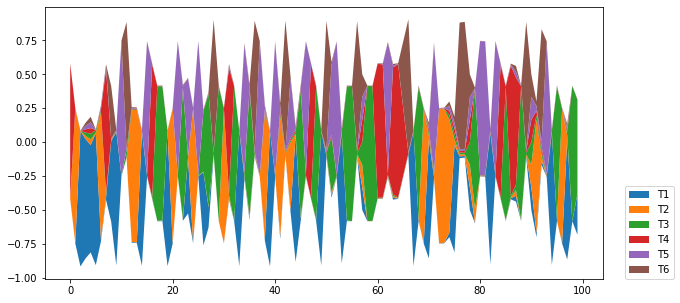

In [32]:
x_axis = corpus_df2.index
y_axis = features

fig, ax = plt.subplots(figsize=(10,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [33]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
model.components_

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[8.49582379, 4.52772043, 7.48770036, ..., 0.31483115, 1.1311762 ,
        0.32507559],
       [1.93607657, 4.46877838, 0.36138032, ..., 0.33626278, 1.21153257,
        4.41269208],
       [8.81095816, 5.58759511, 0.36069879, ..., 1.95370213, 1.12009182,
        0.40042778],
       [4.36357876, 2.08944413, 0.36780104, ..., 1.16027289, 0.36138835,
        1.13049407],
       [8.51098995, 1.16156096, 1.98328365, ..., 0.30378938, 1.10104461,
        1.12660272],
       [2.12962293, 1.82097317, 0.33782667, ..., 0.31385082, 0.31352604,
        3.48763459]])

In [35]:
# # lda_model - LatentDirichletAllocation()
# # vect - CountVectorizer()
# # texts - the list of tokenized words
# norm_corpus
# norm_corpus_tokens = [doc.split() for doc in norm_corpus]


# metric_coherence_gensim(measure='c_v', 
#                         top_n=5, 
#                         topic_word_distrib= model.components_, 
#                         dtm=cv.fit_transform(norm_corpus), 
#                         vocab=np.array(cv.get_feature_names()), 
#                         texts=norm_corpus_tokens)

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
%%time

import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
def topic_model_coherence_generator(topic_num_start=2,
                                    topic_num_end=6,
                                    norm_corpus='',
                                    cv_matrix='',
                                    cv=''):
    norm_corpus_tokens = [doc.split() for doc in norm_corpus]
    models = []
    coherence_scores = []

    for i in range(topic_num_start, topic_num_end):
        print(i)
        cur_lda = LatentDirichletAllocation(n_components=i,
                                            max_iter=1000,
                                            random_state=0,
                                           learning_method="online",
                                           n_jobs=-1)
        cur_lda.fit_transform(cv_matrix)
        cur_coherence_score = metric_coherence_gensim(
            measure='c_v',
            top_n=5,
            topic_word_distrib=cur_lda.components_,
            dtm=cv.fit_transform(norm_corpus),
            vocab=np.array(cv.get_feature_names()),
            texts=norm_corpus_tokens)
        models.append(cur_lda)
        coherence_scores.append(np.mean(cur_coherence_score))
    return models, coherence_scores


ts = 2
te = 10
models, coherence_scores = topic_model_coherence_generator(
    ts, te, norm_corpus=norm_corpus, cv=cv, cv_matrix=cv_matrix)

coherence_df = pd.DataFrame({
    'TOPIC_NUMBER': [str(i) for i in range(ts, te)],
    'COHERENCE_SCORE': np.round(coherence_scores, 4)
})

coherence_df.sort_values(by=["COHERENCE_SCORE"], ascending=False)

/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2


/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


3
4
5
6
7
8
9
CPU times: user 2min 9s, sys: 12.1 s, total: 2min 21s
Wall time: 2min 18s


,TOPIC_NUMBER,COHERENCE_SCORE
4,6,0.57030
0,2,0.52050
7,9,0.50830
1,3,0.46030
2,4,0.45760
3,5,0.44900
5,7,0.44880
6,8,0.39560


/Users/alvinchen/opt/anaconda3/envs/python-notes/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


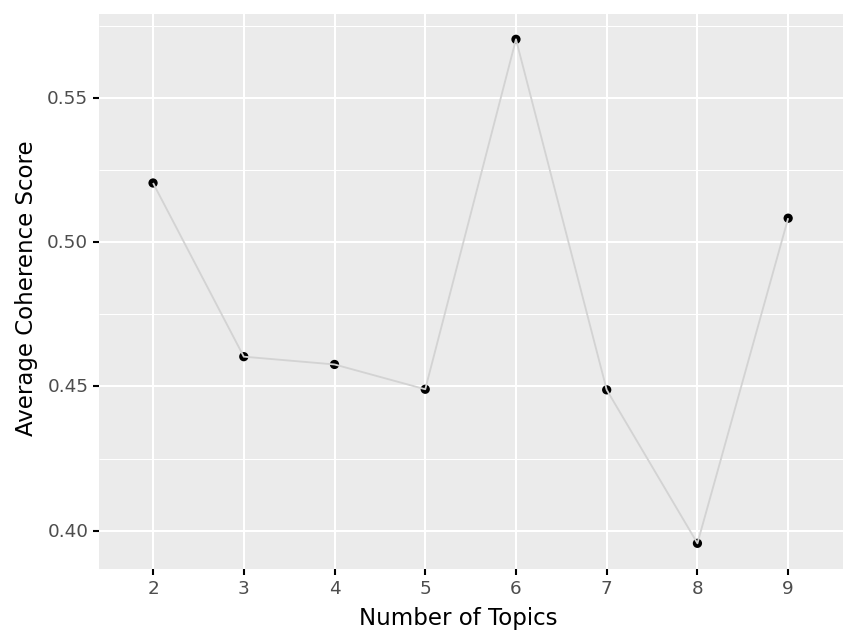

<ggplot: (8776832969399)>

In [38]:
import plotnine
from plotnine import ggplot, aes, geom_point, geom_line, labs
plotnine.options.dpi = 150

g = (ggplot(coherence_df) + aes(x="TOPIC_NUMBER", y="COHERENCE_SCORE") +
     geom_point(stat="identity") + geom_line(group=1, color="lightgrey") +
     labs(x="Number of Topics", y="Average Coherence Score"))
g